Description:
The Worldwide Governance Indicators (WGI) project reports aggregate and individual governance indicators for 215 economies over the period 1996–2017, for six dimensions of governance:

Voice and Accountability : perceptions of the extent to which a country's citizens are able to participate in selecting their government, as well as freedom of expression, freedom of association, and a free media.

Political Stability and Absence of Violence : perceptions of the likelihood of political instability and/or politicallymotivated violence, including terrorism.

Government Effectiveness : perceptions of the quality of public services, the quality of the civil service and the degree
of its independence from political pressures, the quality of policy formulation and implementation, and the credibility of the
government's commitment to such policies.

Regulatory Quality :  perceptions of the ability of the government to formulate and implement sound policies and regulations that permit and promote private sector development.

Rule of Law :  perceptions of the extent to which agents have confidence in and abide by the rules of society, and in particular thequality of contract enforcement, property rights, the police, and the courts, as well as the likelihood of crime and violence. 

Control of Corruption : perceptions of the extent to which public power is exercised for private gain, including both petty and
grand forms of corruption, as well as "capture" of the state by elites and private interests.

In [14]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white") # change the default seaborn graphics style 
%matplotlib inline

In [15]:
#datas import
# dropna() allows us to delete countries we don't have all the informations
WGI = pandas.read_csv("https://fxjollois.github.io/donnees/WGI/wgi2019.csv").dropna()
WGI

,Country,Code,Voice and Accountability,Political Stability and Absence of Violence/Terrorism,Government Effectiveness,Regulatory Quality,Rule of Law,Control of Corruption
0,Aruba,ABW,1.294189,1.357372,1.029933,0.857360,1.263128,1.217238
1,Andorra,ADO,1.139154,1.615139,1.908749,1.228176,1.579939,1.234392
2,Afghanistan,AFG,-0.988032,-2.649407,-1.463875,-1.120555,-1.713527,-1.401076
3,Angola,AGO,-0.777283,-0.311101,-1.117144,-0.893871,-1.054343,-1.054683
5,Albania,ALB,0.151805,0.118570,-0.061331,0.274380,-0.411179,-0.528758
...,...,...,...,...,...,...,...,...
209,Serbia,SRB,0.026626,-0.091665,0.019079,0.113867,-0.119070,-0.445551
210,South Africa,ZAF,0.670388,-0.217931,0.367380,0.156172,-0.076408,0.084924
211,"Congo, Dem. Rep.",ZAR,-1.365966,-1.808007,-1.627429,-1.509667,-1.786088,-1.538931
212,Zambia,ZMB,-0.286199,-0.102216,-0.675215,-0.554269,-0.462069,-0.640345


<AxesSubplot:>

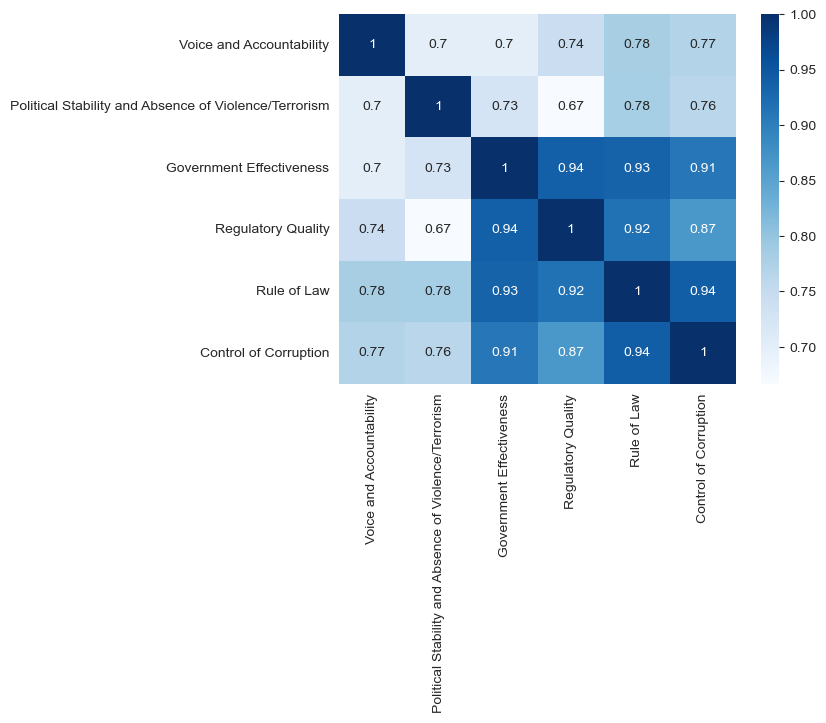

In [16]:
#correlation between the variables
WGI_corr = WGI.corr()
#vizualisation
seaborn.heatmap(WGI.corr(), annot = True, cmap = "Blues")

In [17]:
#PCA
!pip install sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [18]:
#keeping only numeric variables
WGI_numeric = WGI.drop(columns = ["Code","Country"])

In [19]:
pca = PCA()
pca.fit(WGI_numeric)

PCA()

In [37]:
#explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(WGI_numeric.shape[1])], 
        "Explained variance" : pca.explained_variance_,
        "% explained variance" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% add. explained var." : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

[5.04959218 0.41467898 0.30759716 0.12165034 0.04965011 0.04069217]
[0.84386857 0.06929957 0.05140446 0.02032974 0.00829734 0.00680032]


,Dimension,Explained variance,% explained variance,% add. explained var.
0,Dim1,5.049592,84.0,84.0
1,Dim2,0.414679,7.0,91.0
2,Dim3,0.307597,5.0,96.0
3,Dim4,0.121650,2.0,98.0
4,Dim5,0.049650,1.0,99.0
5,Dim6,0.040692,1.0,100.0


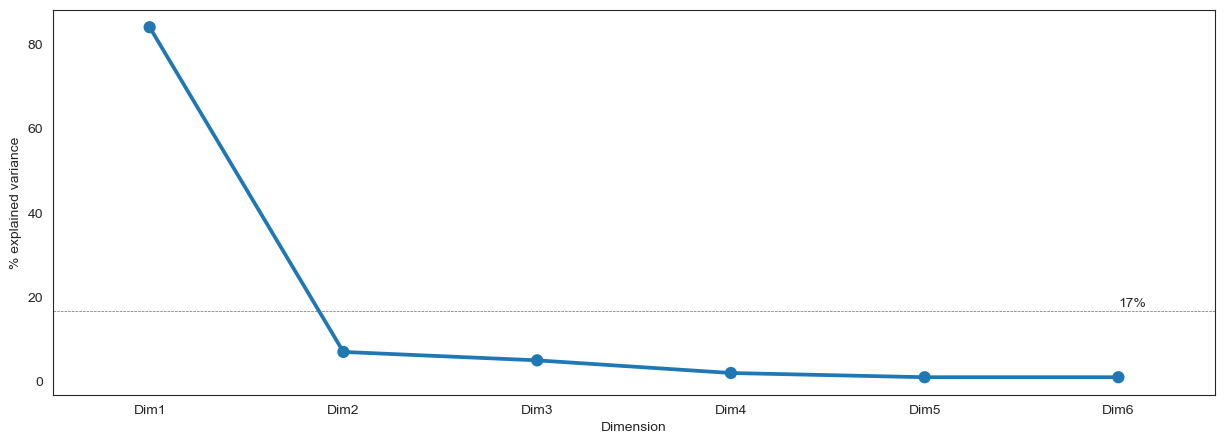

In [41]:
plt.figure(figsize = (15, 5)) # to modify graphic size
seaborn.pointplot(data = eig, x = "Dimension", y = "% explained variance")
threshold = 100 / WGI_numeric.shape[1]
plt.text(WGI_numeric.shape[1] - 1, threshold + 1, str(round(threshold)) + "%")
plt.axhline(y = threshold, linewidth = .5, color = "dimgray", linestyle = "--")
plt.show()
#we opt for 2 dimensions because it's where the line breaks and we are bellow the threshold

In [21]:
#Coordinates on the circle
pca.components_

array([[-0.37750239, -0.37087719, -0.42378854, -0.41732608, -0.43430217,
        -0.42138568],
       [ 0.48844396,  0.65583402, -0.37286018, -0.40542468, -0.13257594,
        -0.10165618],
       [-0.76537562,  0.60350415,  0.16241413, -0.12927521,  0.06087085,
         0.05645548],
       [-0.05176049, -0.23361868, -0.14986293, -0.55342169,  0.18333703,
         0.76183741],
       [-0.13050531, -0.02085703, -0.61015461,  0.17529628,  0.73828359,
        -0.18561589],
       [ 0.11577491, -0.11446349,  0.51014965, -0.5547552 ,  0.45980959,
        -0.44052629]])

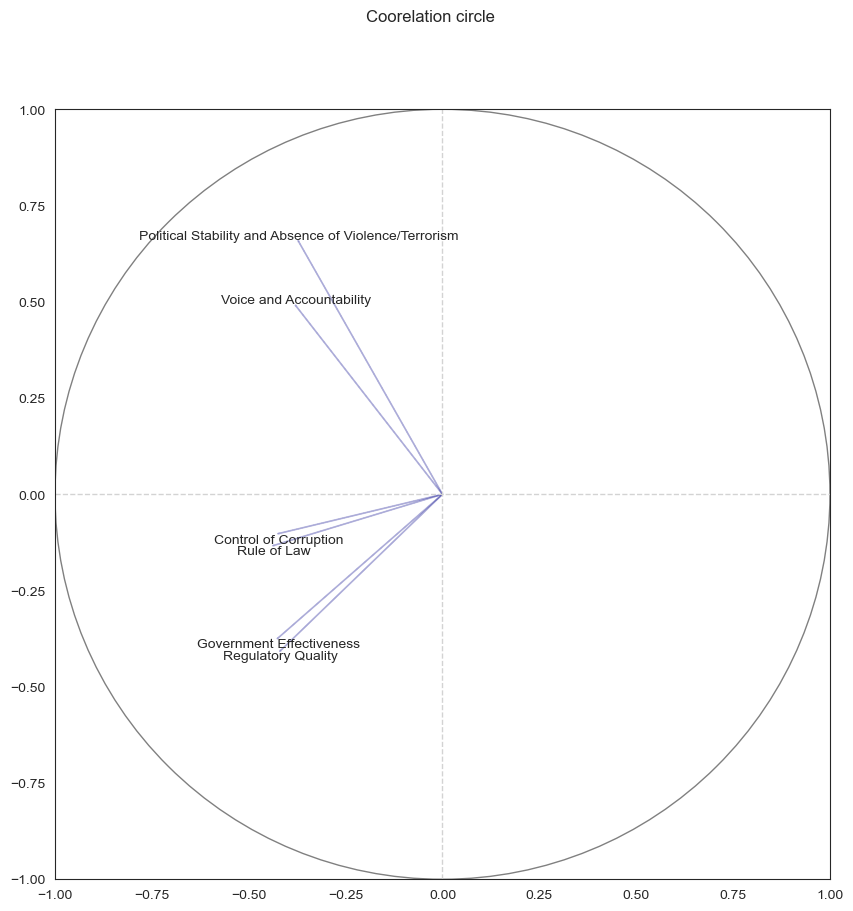

In [22]:
#Correlation circle
# Creation of a empty figure (axes between -1 and 1 + the title)
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Correlation circle")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Adding of axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Adding of variables names
for j in range(WGI_numeric.shape[1]):
    axes.arrow(0, 0, pca.components_[0, j], pca.components_[1, j], width = .001, color = "darkblue", alpha = .25)
    if (pca.components_[1, j] > 0):
        va = "bottom"
    else:
        va = "top"
    axes.text(pca.components_[0, j], pca.components_[1, j], WGI_numeric.columns.values[j], ha = "center", va = va)
# Adding of the circle
plt.gca().add_artist(plt.Circle((0,0), 1, color = 'gray', fill = False))

plt.show()

Control of Corruption and Rule of Law are quite correlated to the first axe (nagatively).
Political Stability and Absence of Violence/Terrorism is the variable the most correlated with the second axe (positvely).

The variables are all negatively correlated with first axe, so the countries which will be represented on the right of the graph will be the countries with a bad Governance Indicator while those represented on the left will have a good Governance Indicator.

In [30]:
#Observations visualization
#observation coordinates
WGI_pca = pca.transform(WGI_numeric)
# Transformation as a DataFrame pandas
WGI_pca_df = pandas.DataFrame({
    "Dim1" : WGI_pca[:,0], 
    "Dim2" : WGI_pca[:,1],
    "Country" : WGI["Country"]
})
WGI_pca_df.head()

,Dim1,Dim2,Country
0,-2.921523,0.503627,Aruba
1,-3.630601,0.075195,Andorra
2,3.704414,-0.846353,Afghanistan
3,2.083839,0.446336,Angola
5,0.137824,0.175896,Albania


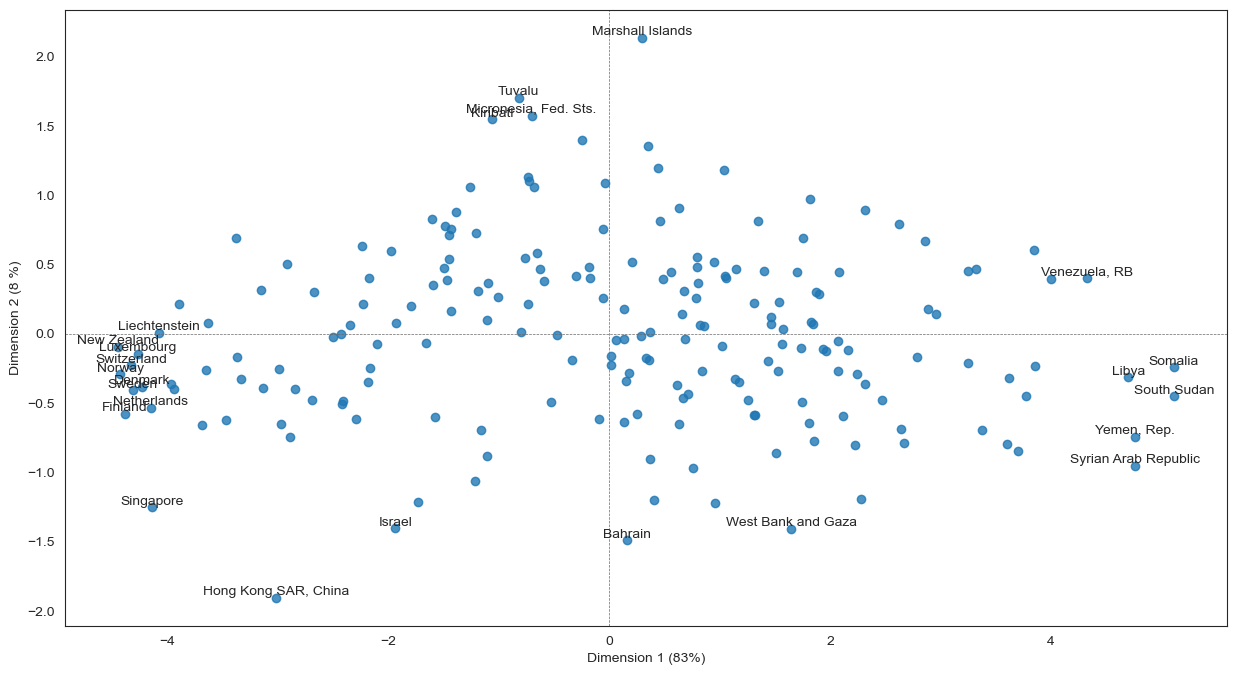

In [45]:
#graphic representation of the countries
fig, ax = plt.subplots(figsize=(15,8))
plt.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")
seaborn.regplot(data = WGI_pca_df, x = "Dim1", y = "Dim2", fit_reg = False, ax = ax)

for k in WGI_pca_df.iterrows():
    if (abs(k[1]['Dim1']) > 4) | (abs(k[1]['Dim2']) > 1.4):
        ax.annotate((k[1]["Country"]), (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10, ha = "center", va = "bottom")

plt.xlabel("Dimension 1 (83%)") # modification of the name of the axe X
plt.ylabel("Dimension 2 (8 %)") # same for axe Y
plt.show()

Countries with good indicator are principally from North of Europe.
Countries with less good indicator are mostly from Middle-East and Africa.

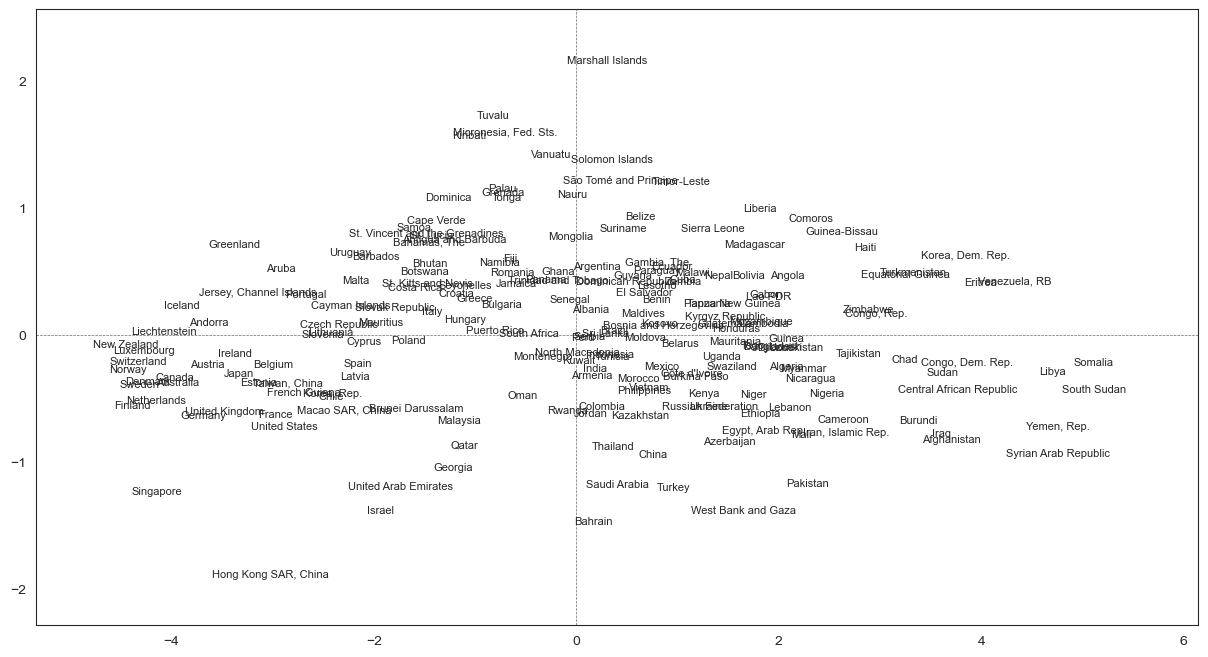

In [46]:
fig, ax = plt.subplots(figsize=(15,8))
ax.axvline(x = 0, linewidth = .5, color = "dimgray", linestyle = "--")
ax.axhline(y = 0, linewidth = .5, color = "dimgray", linestyle = "--")
exp = 1.2 # permet d'étendre les limites des axes pour bien intégrer toutes les années
ax.set_xlim(numpy.min(WGI_pca_df.Dim1) * exp, numpy.max(WGI_pca_df.Dim1) * exp)
ax.set_ylim(numpy.min(WGI_pca_df.Dim2) * exp, numpy.max(WGI_pca_df.Dim2) * exp)

for k in WGI_pca_df.iterrows():
    ax.annotate((k[1]["Country"]), (k[1]['Dim1'], k[1]['Dim2']), fontsize = 8, ha = "center")